In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets

In [2]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
'''
cifar=datasets.cifar10
(x_train,y_train),(x_test,y_test)=cifar.load_data()
class_name = [['airplane'],['car'],['bird'],['cat'],['deer'],['dog'],['frog'],['horse']
              ,['ship'],['truck']]
class_name=np.array(class_name)
class_name.reshape(10,1)'''

"\ncifar=datasets.cifar10\n(x_train,y_train),(x_test,y_test)=cifar.load_data()\nclass_name = [['airplane'],['car'],['bird'],['cat'],['deer'],['dog'],['frog'],['horse']\n              ,['ship'],['truck']]\nclass_name=np.array(class_name)\nclass_name.reshape(10,1)"

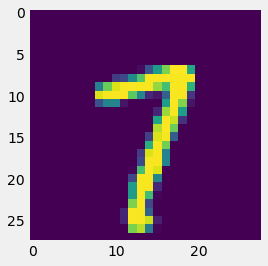

In [3]:
plt.imshow(x_train[96])
plt.grid(False)

In [4]:
y_train=y_train.reshape(len(y_train),)
y_train.shape

(60000,)

In [5]:
only_zeros=x_train[y_train==1]
print(only_zeros.shape)

(6742, 28, 28)


In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten,Dense,Reshape
from tensorflow.keras.models import Sequential

In [7]:
discriminator=Sequential()

discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(500,activation='relu'))
discriminator.add(Dense(450,activation='relu'))
discriminator.add(Dense(200,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [8]:
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 450)               225450    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               90200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 728,351
Trainable params: 728,351
Non-trainable params: 0
__________________________________________________

In [9]:
coding_size=300

generator=Sequential()
generator.add(Dense(300,activation='relu',input_shape=[coding_size]))
generator.add(Dense(500,activation='relu'))
generator.add(Dense(1000,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

In [10]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_6 (Dense)              (None, 500)               150500    
_________________________________________________________________
dense_7 (Dense)              (None, 1000)              501000    
_________________________________________________________________
dense_8 (Dense)              (None, 784)               784784    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28)            0         
Total params: 1,526,584
Trainable params: 1,526,584
Non-trainable params: 0
_________________________________________________________________


In [11]:
GAN=Sequential([generator,discriminator])

In [12]:
discriminator.trainable=False

In [13]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [14]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28)            1526584   
_________________________________________________________________
sequential (Sequential)      (None, 1)                 728351    
Total params: 2,254,935
Trainable params: 1,526,584
Non-trainable params: 728,351
_________________________________________________________________


In [15]:
batch_size=32
my_dataset=only_zeros
dataset=tf.data.Dataset.from_tensor_slices(my_dataset).shuffle(buffer_size=1000)
print(dataset)

<ShuffleDataset shapes: (28, 28), types: tf.uint8>


In [16]:
dataset=dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)

In [17]:
c=100
generator,discriminator=GAN.layers

for epoch in range(c):
    
    print(f"current epoch {epoch+1}")
    i=0
    for batch in dataset:
        
        i=i+1
        
        if i%50==0:
            
            print(f"current batch is {i} and current epoch is {epoch+1}")
            
        # discriminator
        
        noise=tf.random.normal(shape=[batch_size,coding_size])
        
        gen_images=generator(noise)
        
        image_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(batch,tf.float32)],axis=0)
        
        y1=tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        
        discriminator.trainable=True
        
        discriminator.train_on_batch(image_fake_vs_real,y1)
        
        #Generator 
        
        noise=tf.random.normal(shape=[batch_size,coding_size])
        
        y2=tf.constant([[1.0]]*batch_size)
        
        discriminator.trainable=False
        
        GAN.train_on_batch(noise,y2)

current epoch 1
current batch is 50 and current epoch is 1
current batch is 100 and current epoch is 1
current batch is 150 and current epoch is 1
current batch is 200 and current epoch is 1
current epoch 2
current batch is 50 and current epoch is 2
current batch is 100 and current epoch is 2
current batch is 150 and current epoch is 2
current batch is 200 and current epoch is 2
current epoch 3
current batch is 50 and current epoch is 3
current batch is 100 and current epoch is 3
current batch is 150 and current epoch is 3
current batch is 200 and current epoch is 3
current epoch 4
current batch is 50 and current epoch is 4
current batch is 100 and current epoch is 4
current batch is 150 and current epoch is 4
current batch is 200 and current epoch is 4
current epoch 5
current batch is 50 and current epoch is 5
current batch is 100 and current epoch is 5
current batch is 150 and current epoch is 5
current batch is 200 and current epoch is 5
current epoch 6
current batch is 50 and curre

current batch is 50 and current epoch is 43
current batch is 100 and current epoch is 43
current batch is 150 and current epoch is 43
current batch is 200 and current epoch is 43
current epoch 44
current batch is 50 and current epoch is 44
current batch is 100 and current epoch is 44
current batch is 150 and current epoch is 44
current batch is 200 and current epoch is 44
current epoch 45
current batch is 50 and current epoch is 45
current batch is 100 and current epoch is 45
current batch is 150 and current epoch is 45
current batch is 200 and current epoch is 45
current epoch 46
current batch is 50 and current epoch is 46
current batch is 100 and current epoch is 46
current batch is 150 and current epoch is 46
current batch is 200 and current epoch is 46
current epoch 47
current batch is 50 and current epoch is 47
current batch is 100 and current epoch is 47
current batch is 150 and current epoch is 47
current batch is 200 and current epoch is 47
current epoch 48
current batch is 50 

current epoch 85
current batch is 50 and current epoch is 85
current batch is 100 and current epoch is 85
current batch is 150 and current epoch is 85
current batch is 200 and current epoch is 85
current epoch 86
current batch is 50 and current epoch is 86
current batch is 100 and current epoch is 86
current batch is 150 and current epoch is 86
current batch is 200 and current epoch is 86
current epoch 87
current batch is 50 and current epoch is 87
current batch is 100 and current epoch is 87
current batch is 150 and current epoch is 87
current batch is 200 and current epoch is 87
current epoch 88
current batch is 50 and current epoch is 88
current batch is 100 and current epoch is 88
current batch is 150 and current epoch is 88
current batch is 200 and current epoch is 88
current epoch 89
current batch is 50 and current epoch is 89
current batch is 100 and current epoch is 89
current batch is 150 and current epoch is 89
current batch is 200 and current epoch is 89
current epoch 90
cur

In [18]:
checking_noise=tf.random.normal([10,coding_size])

In [19]:
checking_noise.shape

TensorShape([10, 300])

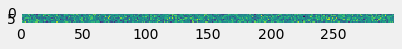

In [20]:
plt.imshow(checking_noise)
plt.grid(False)

In [21]:
gan_images=generator(checking_noise)
gan_images.shape

TensorShape([10, 28, 28])

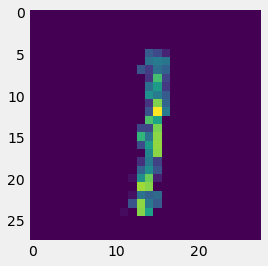

In [23]:
plt.imshow(gan_images[0])
plt.grid(False)